In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Leer archivo CSV
dataset = pd.read_csv('C:/Users/user/Desktop/Practica Python/CBC data_for_meandeley_csv_01052023.csv')

In [3]:
dataset.head()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,1,28,0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
1,2,41,0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
2,3,40,1,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
3,4,76,0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
4,5,20,1,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


In [4]:
# Calcular estadísticas descriptivas de globulos 
media = dataset['HGB'].mean()
mediana = dataset['HGB'].median()
moda = dataset['HGB'].mode()[0] # se utiliza [0] para obtener el primer valor de la serie
desviacion = dataset['HGB'].std()

In [5]:
# Imprimir estadísticas descriptivas
print('Media:', media)
print('Mediana:', mediana)
print('Moda:', moda)
print('Desviación estándar:', desviacion)

Media: 11.907692307692306
Mediana: 12.1
Moda: 13.4
Desviación estándar: 2.186685518760573


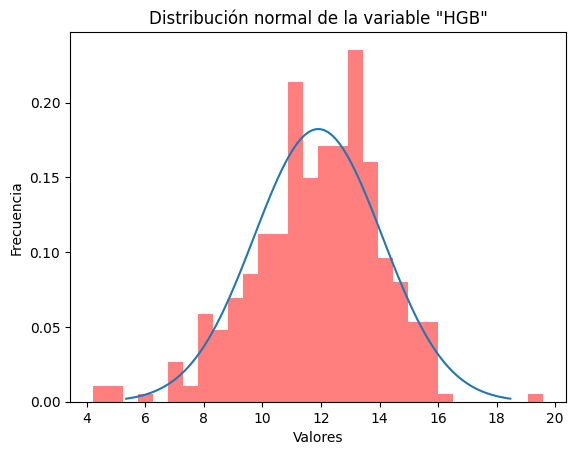

In [33]:
# Generar gráfico de distribución normal
mu, sigma = media, desviacion
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)))
plt.title('Distribución normal de la variable "HGB"')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.hist(dataset['HGB'], bins=30, density=True, alpha=0.5, color='red')
plt.show()

In [7]:
# Separar los datos en variables independientes (X) y dependientes (y)
X = dataset['RBC'].values.reshape(-1, 1)
y = dataset['PCV'].values

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

In [10]:
# Entrenar el modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [11]:
# Coeficientes de regresión
coeficientes = modelo.coef_
intercepto = modelo.intercept_
print(f"Coeficiente de regresión: {coeficientes}")
print(f"Intercepto: {intercepto}")

Coeficiente de regresión: [6.66264334]
Intercepto: 8.442259912826493


In [12]:
# Predecir los valores
y_pred = modelo.predict(X_test)

# Calcular R cuadrada
r_cuadrada = r2_score(y_test, y_pred)
print(f"R cuadrada: {r_cuadrada}")

R cuadrada: 0.5408825878808539


In [19]:
# Mostrar los datos de la regresión
print("Datos de la regresión:")
df_regresion = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred})
print(df_regresion)

Datos de la regresión:
    Actual  Predicción
0     31.7   35.825724
1     33.7   40.889333
2     44.5   42.888126
3     40.1   35.759098
4     38.2   42.288488
..     ...         ...
68    45.2   42.621620
69    35.0   37.957770
70    24.9   27.697299
71    39.8   39.423551
72    33.2   33.560425

[73 rows x 2 columns]


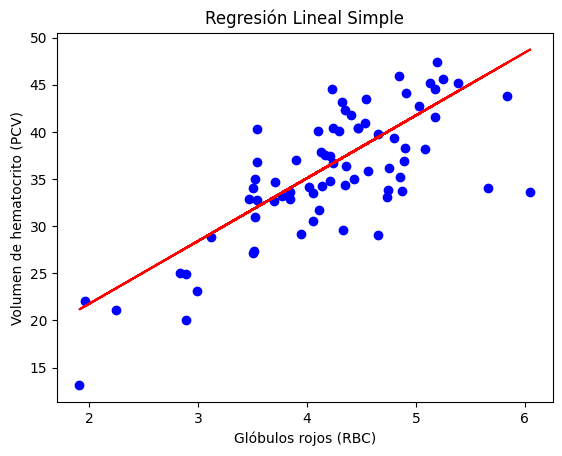

In [32]:
# Graficar
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Regresión Lineal Simple')
plt.xlabel('Glóbulos rojos (RBC)')
plt.ylabel('Volumen de hematocrito (PCV)')
plt.show()

In [21]:
print(f"Coeficiente de regresión: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")
print(f"R cuadrada: {r_cuadrada}")

Coeficiente de regresión: [6.66264334]
Intercepto: 8.442259912826493
R cuadrada: 0.5408825878808539


In [26]:
# Calcular el error absoluto entre los valores actuales y las predicciones
mae = mean_absolute_error(y_test, y_pred)

# Calcular el porcentaje de error
porcentaje_error = (mae / y_test.mean()) * 100

print("Error absoluto:", mae)
print("Porcentaje de error:", porcentaje_error)

Error absoluto: 3.5574596202052953
Porcentaje de error: 10.01251310001105


In [27]:
# Verificar los supuestos
# Media cero
residuos = y_test - modelo.predict(X_test)
media_residuos = np.mean(residuos)
print("Media de los residuos:", media_residuos)

Media de los residuos: -0.9326452830408724


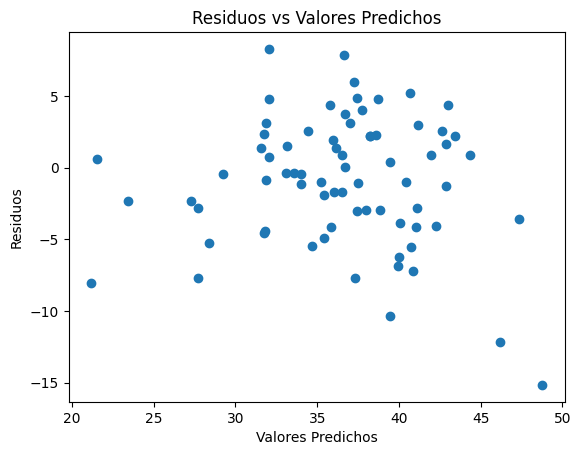

In [28]:
# Homocedasticidad
plt.scatter(modelo.predict(X_test), residuos)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores Predichos")
plt.show()

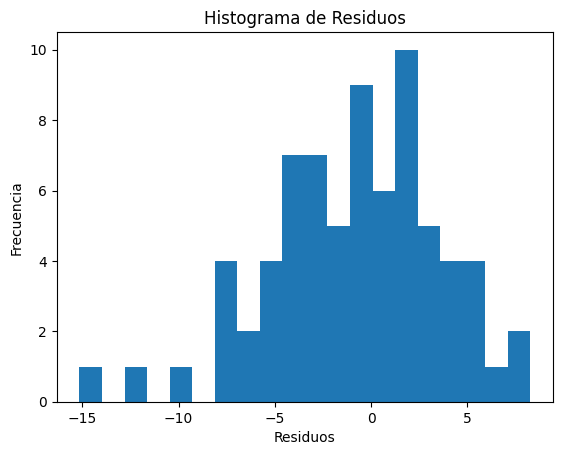

In [29]:
# Normalidad de los residuos
plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

In [30]:
# También puedes calcular el error cuadrático medio para evaluar el ajuste del modelo
mse = mean_squared_error(y_test, modelo.predict(X_test))
print("Error Cuadrático Medio:", mse)

Error Cuadrático Medio: 20.81231869544947
